<a href="https://colab.research.google.com/github/ruchithareddy269/CMPE-257-Assignments/blob/main/cmpe257_K_means_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **# Clustering California Housing Data**

**Business Goal:** By grouping neighborhoods according to different characteristics included in the dataset, this project aims to obtain insights into the California housing market. To help real estate stakeholders, urban planners, and policymakers make decisions, the main goal is to identify trends and commonalities among neighborhoods. By identifying distinct neighborhoods with comparable housing characteristics, clustering can yield important insights for resource allocation, investment strategies, and targeted interventions.

The dataset comprises essential features such as longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, and ocean proximity. Each row in the dataset represents a specific neighborhood in California.

In [33]:
import pandas as pd
# Load data from CSV
file_path = "housing.csv"
housing_data = pd.read_csv(file_path)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [34]:
# Display basic statistics and information
print(housing_data.describe())
print(housing_data.info())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [35]:
# Handle missing values (if any)
housing_data.dropna(inplace=True)

# Encode categorical feature 'ocean_proximity'
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=True)


In [37]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1,0,0,0


In [39]:
from sklearn.cluster import KMeans

# Choose the number of clusters (K)
k1 = 3

# Apply K-means clustering
kmeans1 = KMeans(n_clusters=k1, random_state=42)
housing_data['cluster1'] = kmeans1.fit_predict(housing_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


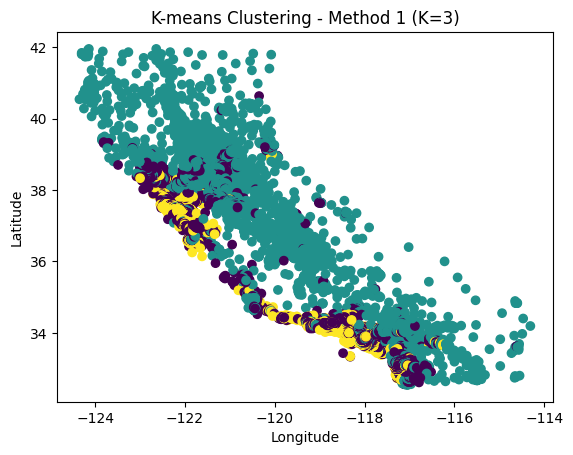

In [40]:
import matplotlib.pyplot as plt
# Scatter plot for clusters
plt.scatter(housing_data['longitude'], housing_data['latitude'], c=housing_data['cluster1'], cmap='viridis')
plt.title(f'K-means Clustering - Method 1 (K={k1})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [70]:
#kmeans
# Choose another number of clusters (K)
k2 = 4

# Apply K-means clustering
kmeans2 = KMeans(n_clusters=k2, random_state=42)
housing_data['cluster2'] = kmeans2.fit_predict(housing_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


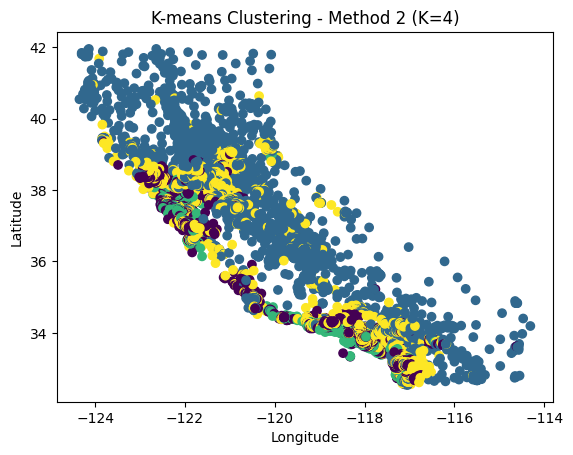

In [71]:
# Scatter plot for clusters
plt.scatter(housing_data['longitude'], housing_data['latitude'], c=housing_data['cluster2'], cmap='viridis')
plt.title(f'K-means Clustering - Method 2 (K={k2})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [48]:
# K-means clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_model.fit_predict(housing_data)
kmeans_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [51]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, completeness_score
# Mini-Batch K-means clustering
minibatch_kmeans_model = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=100)
minibatch_kmeans_labels = minibatch_kmeans_model.fit_predict(housing_data)
minibatch_kmeans_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=100, n_clusters=3, random_state=42)

In [56]:

# Evaluate clustering performance using metrics
silhouette_score_kmeans = silhouette_score(housing_data, kmeans_labels)
silhouette_score_minibatch = silhouette_score(housing_data, minibatch_kmeans_labels)

davies_bouldin_score_kmeans = davies_bouldin_score(housing_data, kmeans_labels)
davies_bouldin_score_minibatch = davies_bouldin_score(housing_data, minibatch_kmeans_labels)


In [58]:
# Print clustering metrics
print("K-means Silhouette Score:", silhouette_score_kmeans)
print("Mini-Batch K-means Silhouette Score:", silhouette_score_minibatch)
print("\nK-means Davies Bouldin Score:", davies_bouldin_score_kmeans)
print("Mini-Batch K-means Davies Bouldin Score:", davies_bouldin_score_minibatch)


K-means Silhouette Score: 0.5683423192658962
Mini-Batch K-means Silhouette Score: 0.5710071337039648

K-means Davies Bouldin Score: 0.538361948041011
Mini-Batch K-means Davies Bouldin Score: 0.5341729778933509


In [64]:
from sklearn.cluster import KMeans, MiniBatchKMeans

# Regular K-means
kmeans_regular = KMeans(n_clusters=3, random_state=42)
kmeans_regular.fit(housing_data)
housing_data['cluster_regular'] = kmeans_regular.labels_

# Mini-Batch K-means
kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans_mini_batch.fit(housing_data)
housing_data['cluster_mini_batch'] = kmeans_mini_batch.labels_

# K-means++ Initialization
kmeans_plus_plus = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_plus_plus.fit(housing_data)
housing_data['cluster_kmeans++'] = kmeans_plus_plus.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


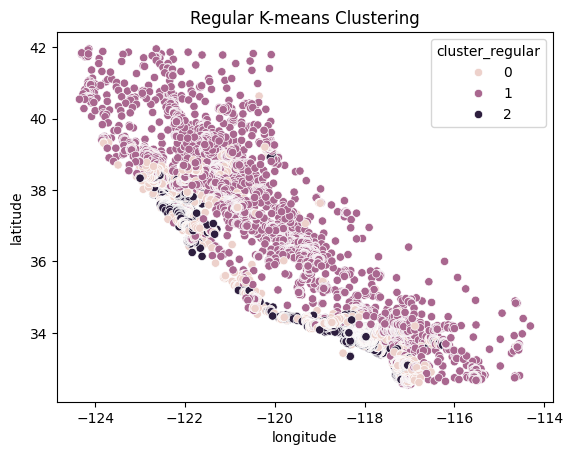

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters
sns.scatterplot(x='longitude', y='latitude', hue='cluster_regular', data=housing_data)
plt.title('Regular K-means Clustering')
plt.show()

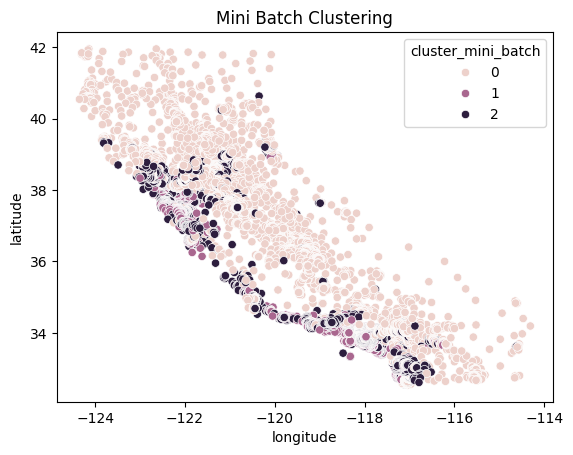

In [68]:
sns.scatterplot(x='longitude', y='latitude', hue='cluster_mini_batch', data=housing_data)
plt.title('Mini Batch Clustering')
plt.show()

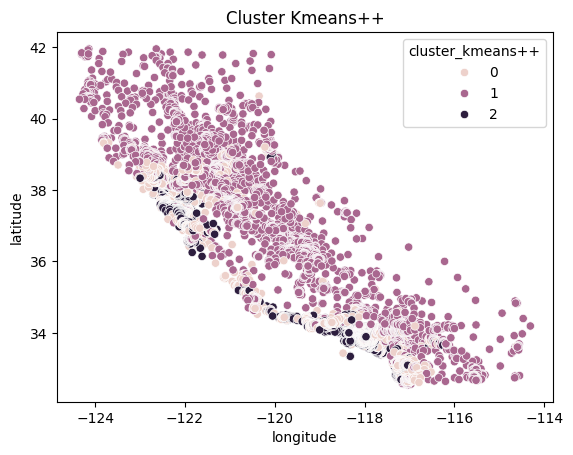

In [69]:
sns.scatterplot(x='longitude', y='latitude', hue='cluster_kmeans++', data=housing_data)
plt.title('Cluster Kmeans++')
plt.show()